Компоненты временных рядов

* Тренд - плавное долгосрочное изменения уровня ряда

* Сезонность - циклические изменения уровня ряда с постоянным периодом

* Цикл - изменения уровня ряда с переменным периодом (экономические циклы, периоды солнечной активности)

* Ошибка - непрогнозируемая случайная компонента ряда

Данные лежат: https://github.com/facebook/prophet/blob/main/examples/example_wp_log_peyton_manning.csv

In [ ]:
!wget -O time_series_data.csv https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv

--2022-11-18 11:19:22--  https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86845 (85K) [text/plain]
Saving to: ‘time_series_data.csv’

time_series_data.cs 100%[===================>]  84.81K  --.-KB/s    in 0.01s   

2022-11-18 11:19:23 (6.37 MB/s) - ‘time_series_data.csv’ saved [86845/86845]



In [ ]:
import os
os.listdir()

['.config', 'time_series_data.csv', 'sample_data']

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("time_series_data.csv")

In [ ]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
df['ds'].iloc[0] # Тип срока

'2007-12-10'

Сделаем копию и приведем столбец с датами к типу datetime

In [ ]:
df_copy = df.copy(deep=True)
df_copy['ds'] = pd.to_datetime(df_copy['ds'])

In [ ]:
#df_copy.head()

In [ ]:
df_copy['ds'].iloc[0] # проверяем

Timestamp('2007-12-10 00:00:00')

Уставновим в качестве индекса столбец с датами

In [ ]:
df_copy.set_index('ds', inplace=True)
df_copy

,y
ds,
2007-12-10,9.590761
2007-12-11,8.519590
2007-12-12,8.183677
2007-12-13,8.072467
2007-12-14,7.893572
...,...
2016-01-16,7.817223
2016-01-17,9.273878
2016-01-18,10.333775


# Давайте визуализируем этот временной ряд

### для этого простроим график

In [ ]:
# Постройте график этого временного ряда


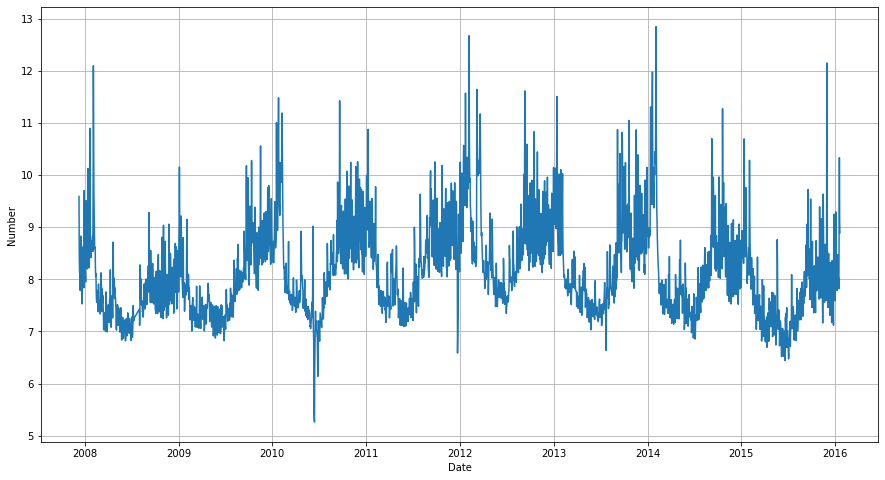

In [ ]:
plt.figure(figsize=(15, 8))
plt.xlabel("Date")
plt.ylabel("Number")
plt.grid()
plt.plot(df_copy.index, df_copy['y'])

### Один из способов сглаживания временных рядов - Это скользящее среднее

https://habr.com/ru/post/477206/

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    """
    series - датафрейм временной серии
    window - размер скользящего окна
    plot_intervals - показывает доверительный интервал
    plot_anomalies - Показывает аномалии
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title(f"Скользящее среднее\n размер окна = {window}")
    plt.plot(series[window:], label="Значения")
    plt.plot(rolling_mean, "r", label="Скользящее среднее")

    # Отображение доверительных интервалов для сглаженных значений
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Верхний и нижняя граница")
        plt.plot(lower_bond, "r--")
    plt.legend(loc="upper left")
    plt.grid(True)

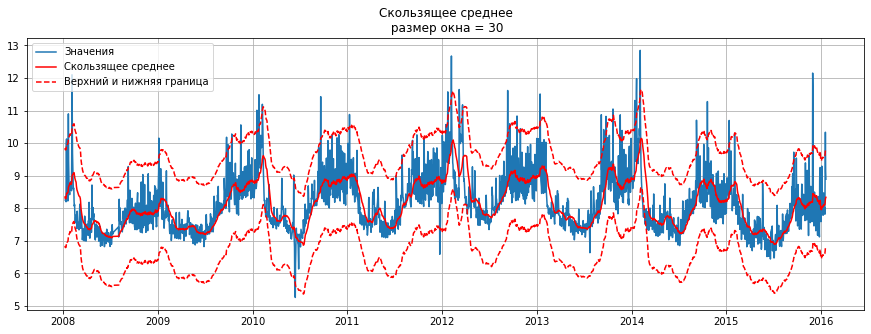

In [ ]:
plot_moving_average(df_copy['y'], window=30, plot_intervals = True, plot_anomalies = True)

Современный стандарт среди алгоритмов прогнозирования временных рядов - это Prophet ("Пророк") от Facebook
https://facebook.github.io/prophet/docs/quick_start.html#python-api

Статья: https://peerj.com/preprints/3190/

Создаем модель Prophet и обучаем её

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbvm8ctb5/61kfr0qw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbvm8ctb5/q6w_a0xm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5265', 'data', 'file=/tmp/tmpbvm8ctb5/61kfr0qw.json', 'init=/tmp/tmpbvm8ctb5/q6w_a0xm.json', 'output', 'file=/tmp/tmpbvm8ctb5/prophet_modely24gsp2u/prophet_model-20221118112918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [ ]:
"""future = m.make_future_dataframe(periods=365)
future"""

'future = m.make_future_dataframe(periods=365)\nfuture'

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208452,7.502975,8.951029
3266,2017-01-16,8.533442,7.801571,9.288488
3267,2017-01-17,8.320853,7.629368,9.084256
3268,2017-01-18,8.153517,7.445638,8.909915
3269,2017-01-19,8.165423,7.437523,8.918337


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.035820,8.212827,9.415402,8.035820,8.035820,0.802814,0.802814,0.802814,0.352279,0.352279,0.352279,0.450535,0.450535,0.450535,0.0,0.0,0.0,8.838634
1,2007-12-11,8.034297,7.945929,9.207873,8.034297,8.034297,0.552915,0.552915,0.552915,0.119616,0.119616,0.119616,0.433299,0.433299,0.433299,0.0,0.0,0.0,8.587212
2,2007-12-12,8.032774,7.768298,9.011477,8.032774,8.032774,0.350351,0.350351,0.350351,-0.066648,-0.066648,-0.066648,0.416999,0.416999,0.416999,0.0,0.0,0.0,8.383125
3,2007-12-13,8.031250,7.734710,8.972847,8.031250,8.031250,0.329798,0.329798,0.329798,-0.072279,-0.072279,-0.072279,0.402077,0.402077,0.402077,0.0,0.0,0.0,8.361048
4,2007-12-14,8.029727,7.746249,9.031163,8.029727,8.029727,0.319379,0.319379,0.319379,-0.069561,-0.069561,-0.069561,0.388940,0.388940,0.388940,0.0,0.0,0.0,8.349107


$$\hat{y}$$

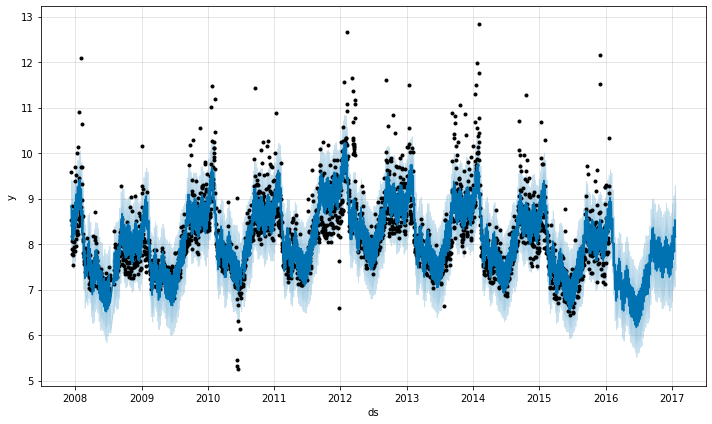

In [ ]:
fig1 = m.plot(forecast)

Черные точки - это реальные данные

Синий ряд - предсказанное значение

Светлоголубой ряд - доверительный интервал

Prophet автоматически оценивает тренд и выявляет годовую и недельную сезонность (если дынные покрывают несколько лет или несколько недель соответственно)


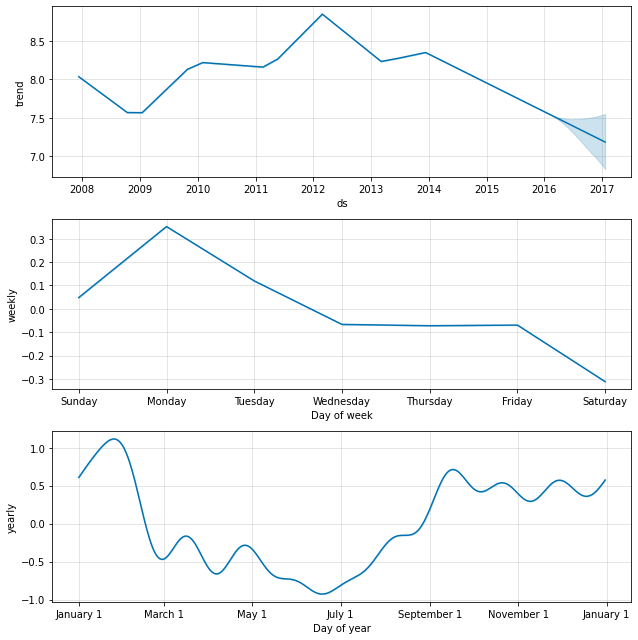

In [ ]:
fig2 = m.plot_components(forecast)

Также графики прогнозва и трендов можно сделать интерактивными, используя модуль построения интерактивных графиков Plotly

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)